# Задача 8. Сравнение методов классификации

** **Дедлайн**: 28.11.2025, 23:59
* Полный балл: 15

## Задача

- [+] Найти данные, на которых интересно будет решать задачу классификации (больше `1000` строк, больше `5` признаков).
- [+] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [+] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [+] При необходимости выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [+] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания для библиотечных реализаций (например, из **sklearn**) четырёх методов классификации.

##### Часть 1 (Поиски Данных и выполнение полезных преобразований)

### Описание датасета
Датасет представляет данные банковского маркетинга для прогнозирования подписки на депозит
#### Описание столбцов датасета
- age - возраст клиента
- job - сфера занятости
- marital - семейное положение
-education - уровень образования
- default - наличие дефолта по кредиту
- balance - средний годовой баланс на счете
- housing - наличие ипотечного кредита
- loan - наличие персонального кредита
- contact - тип связи с клиентом
- day - день последнего контакта
- month - месяц последнего контакта
- duration - длительность последнего контакта (в секундах)
- campaign - количество контактов во время текущей кампании
- pdays - количество дней с последнего контакта в предыдущей кампании (-1 - не контактировали ранее)
- previous - количество контактов до текущей кампании
- poutcome - результат предыдущей маркетинговой кампании

In [81]:
import pandas as pd

df = pd.read_csv('bank.csv')

print(f"Размер: {df.shape}")

Размер: (4521, 17)


#### Выполняем чистку (убираем дубликаты и пропущенные значения)

In [82]:
duplicates = df.duplicated().sum()
print(f"Найдено дубликатов: {duplicates}")

Найдено дубликатов: 0


Дубликатов не найдено. Осталось только провести проверку для пропусков

In [83]:
missing_data = df.isnull().sum()
print(f"Найдено пропусков: \n{missing_data}")

Найдено пропусков: 
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Видим, что пропусков не найдено. Видимо хороший датасет нашли.

### Убираем признаки, которые нельзя категоризовать и вообще они не нужны для анализа
### Убираем:
- month
- day
- pdays

In [84]:
df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome', 'y']]
print(f"Размер: {df.shape}")

Размер: (4521, 14)


### Теперь категоризуем необходимые данные:
- Для категоризации буду использовать LabelEncoder, так как он подходит как для бинарных, так и для многоклассовых

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_columns = ['job', 'marital', 'education', 'default', 'housing',
                      'loan', 'contact', 'poutcome', 'y']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

### Проведем разведочный анализ, используем визуализацию, сделаем выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

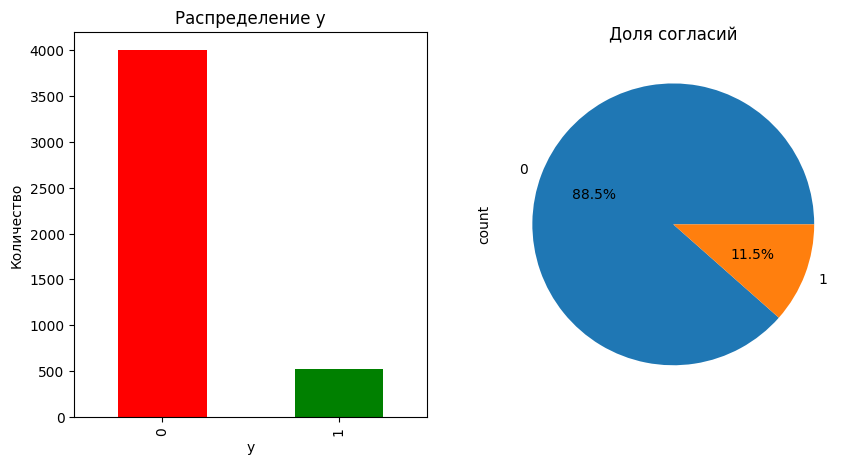

In [86]:
import matplotlib.pyplot as plt

# A graph that shows how many people have signed up for a deposit and how many have not
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['y'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Распределение y')
plt.ylabel('Количество')

# Percentage ratio for or against
plt.subplot(1, 2, 2)
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Доля согласий')
plt.show()

### Теперь выведем графики распределения

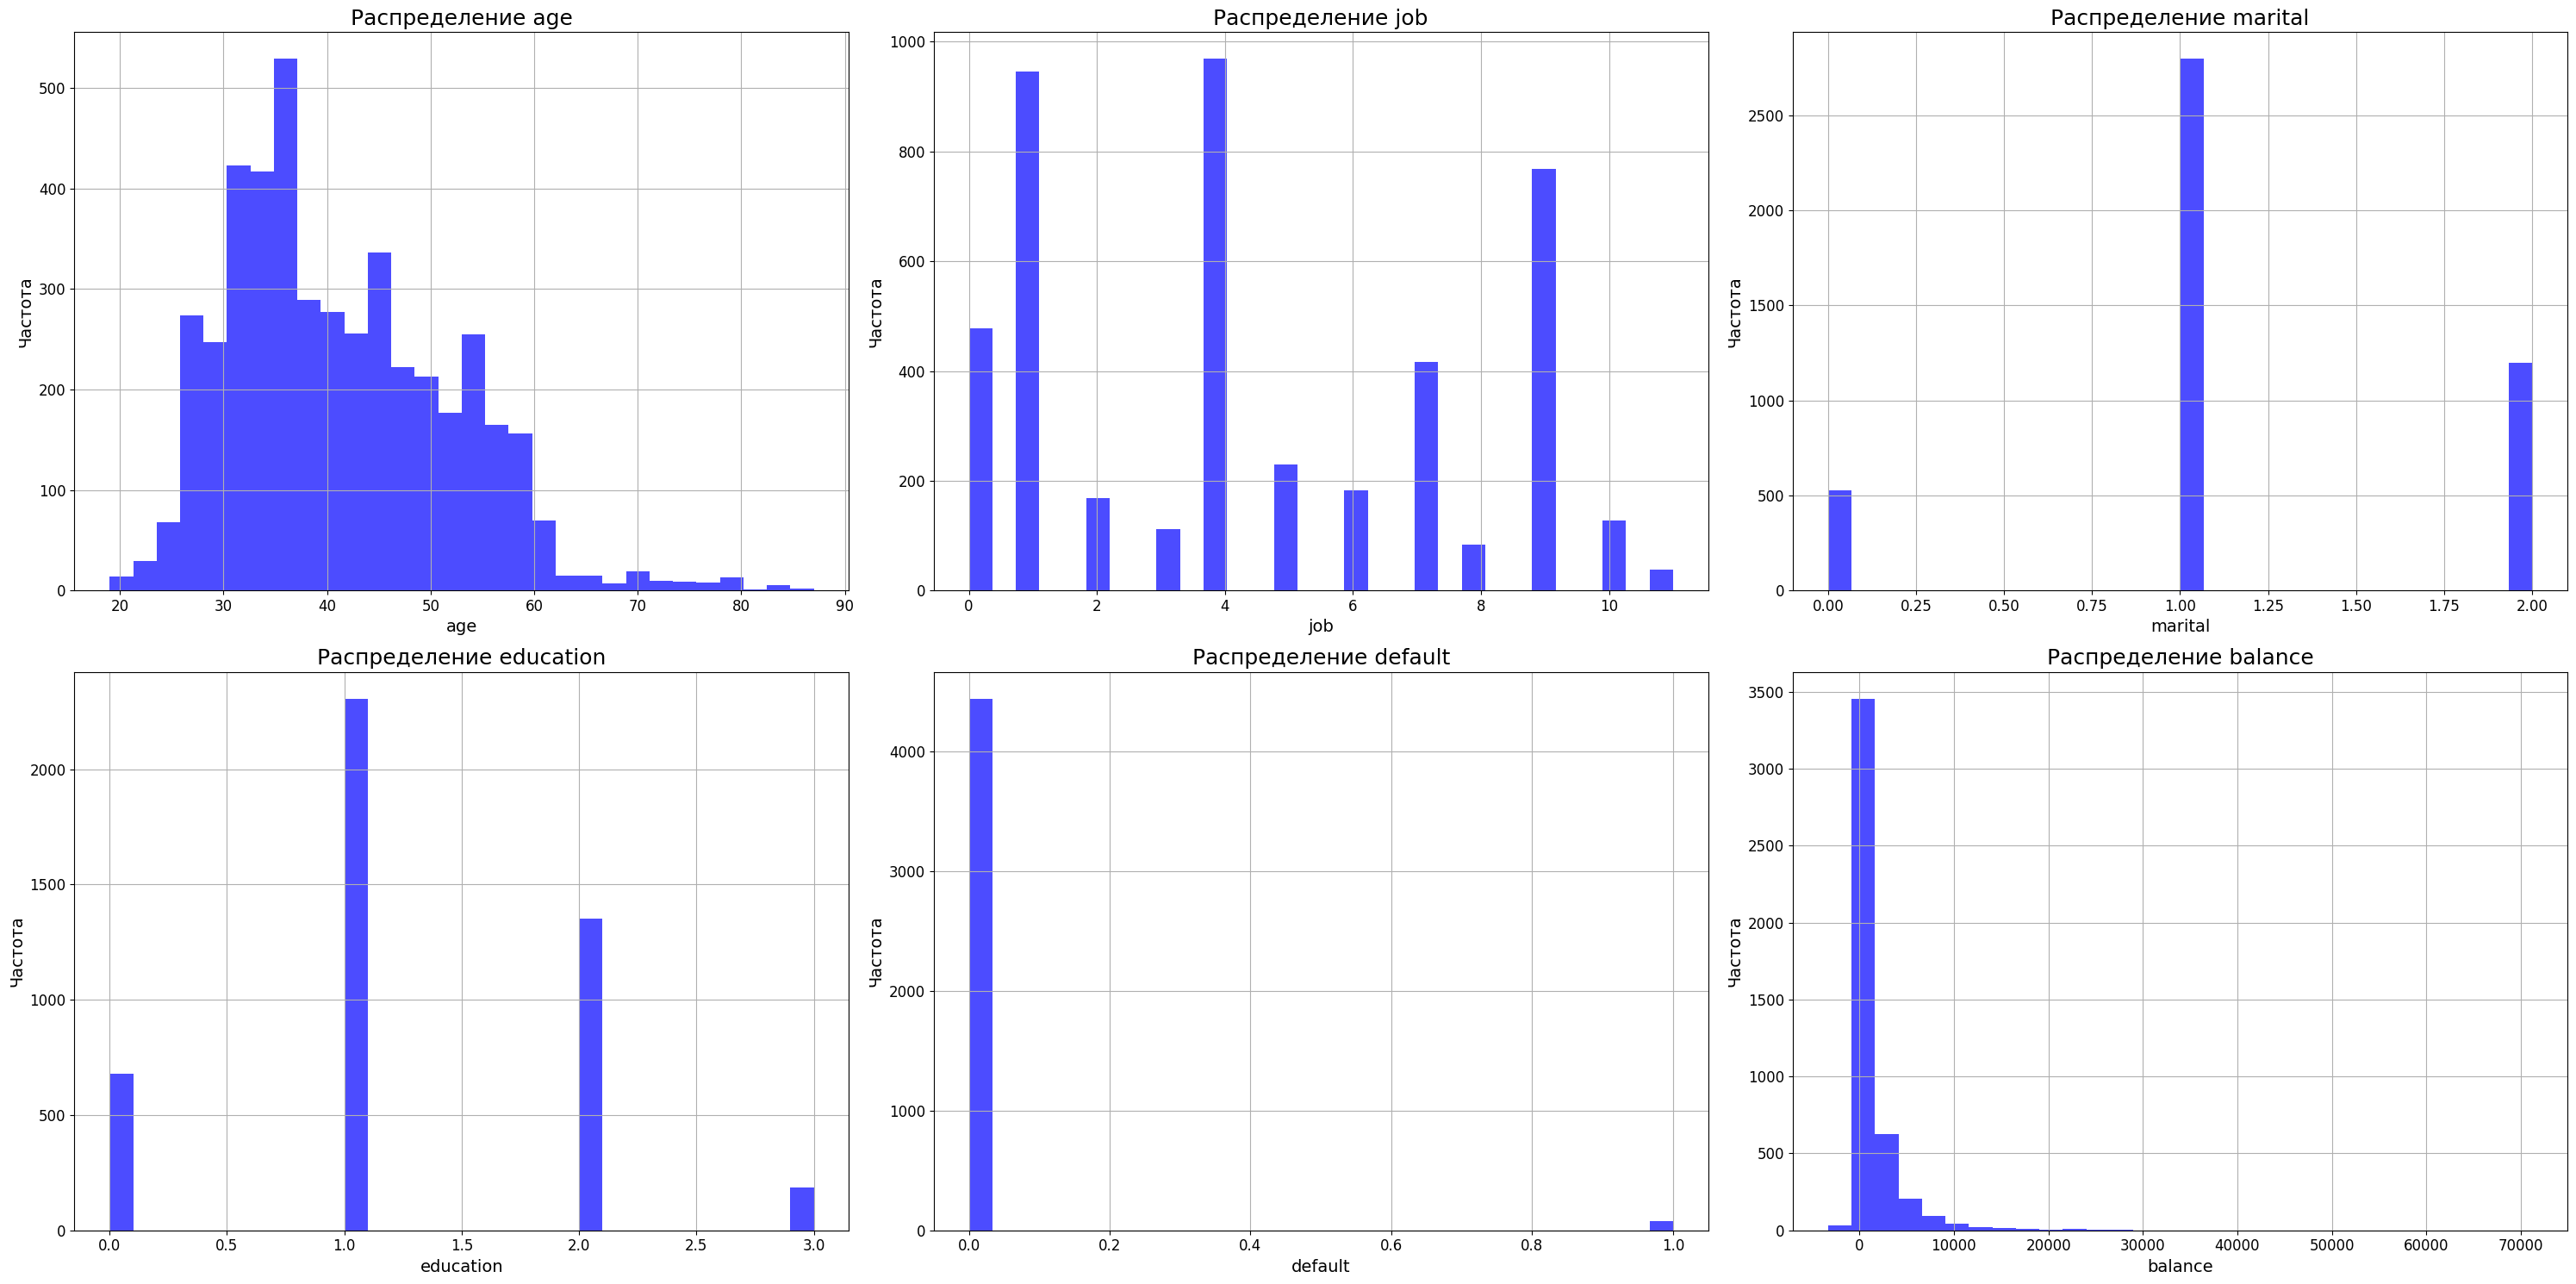

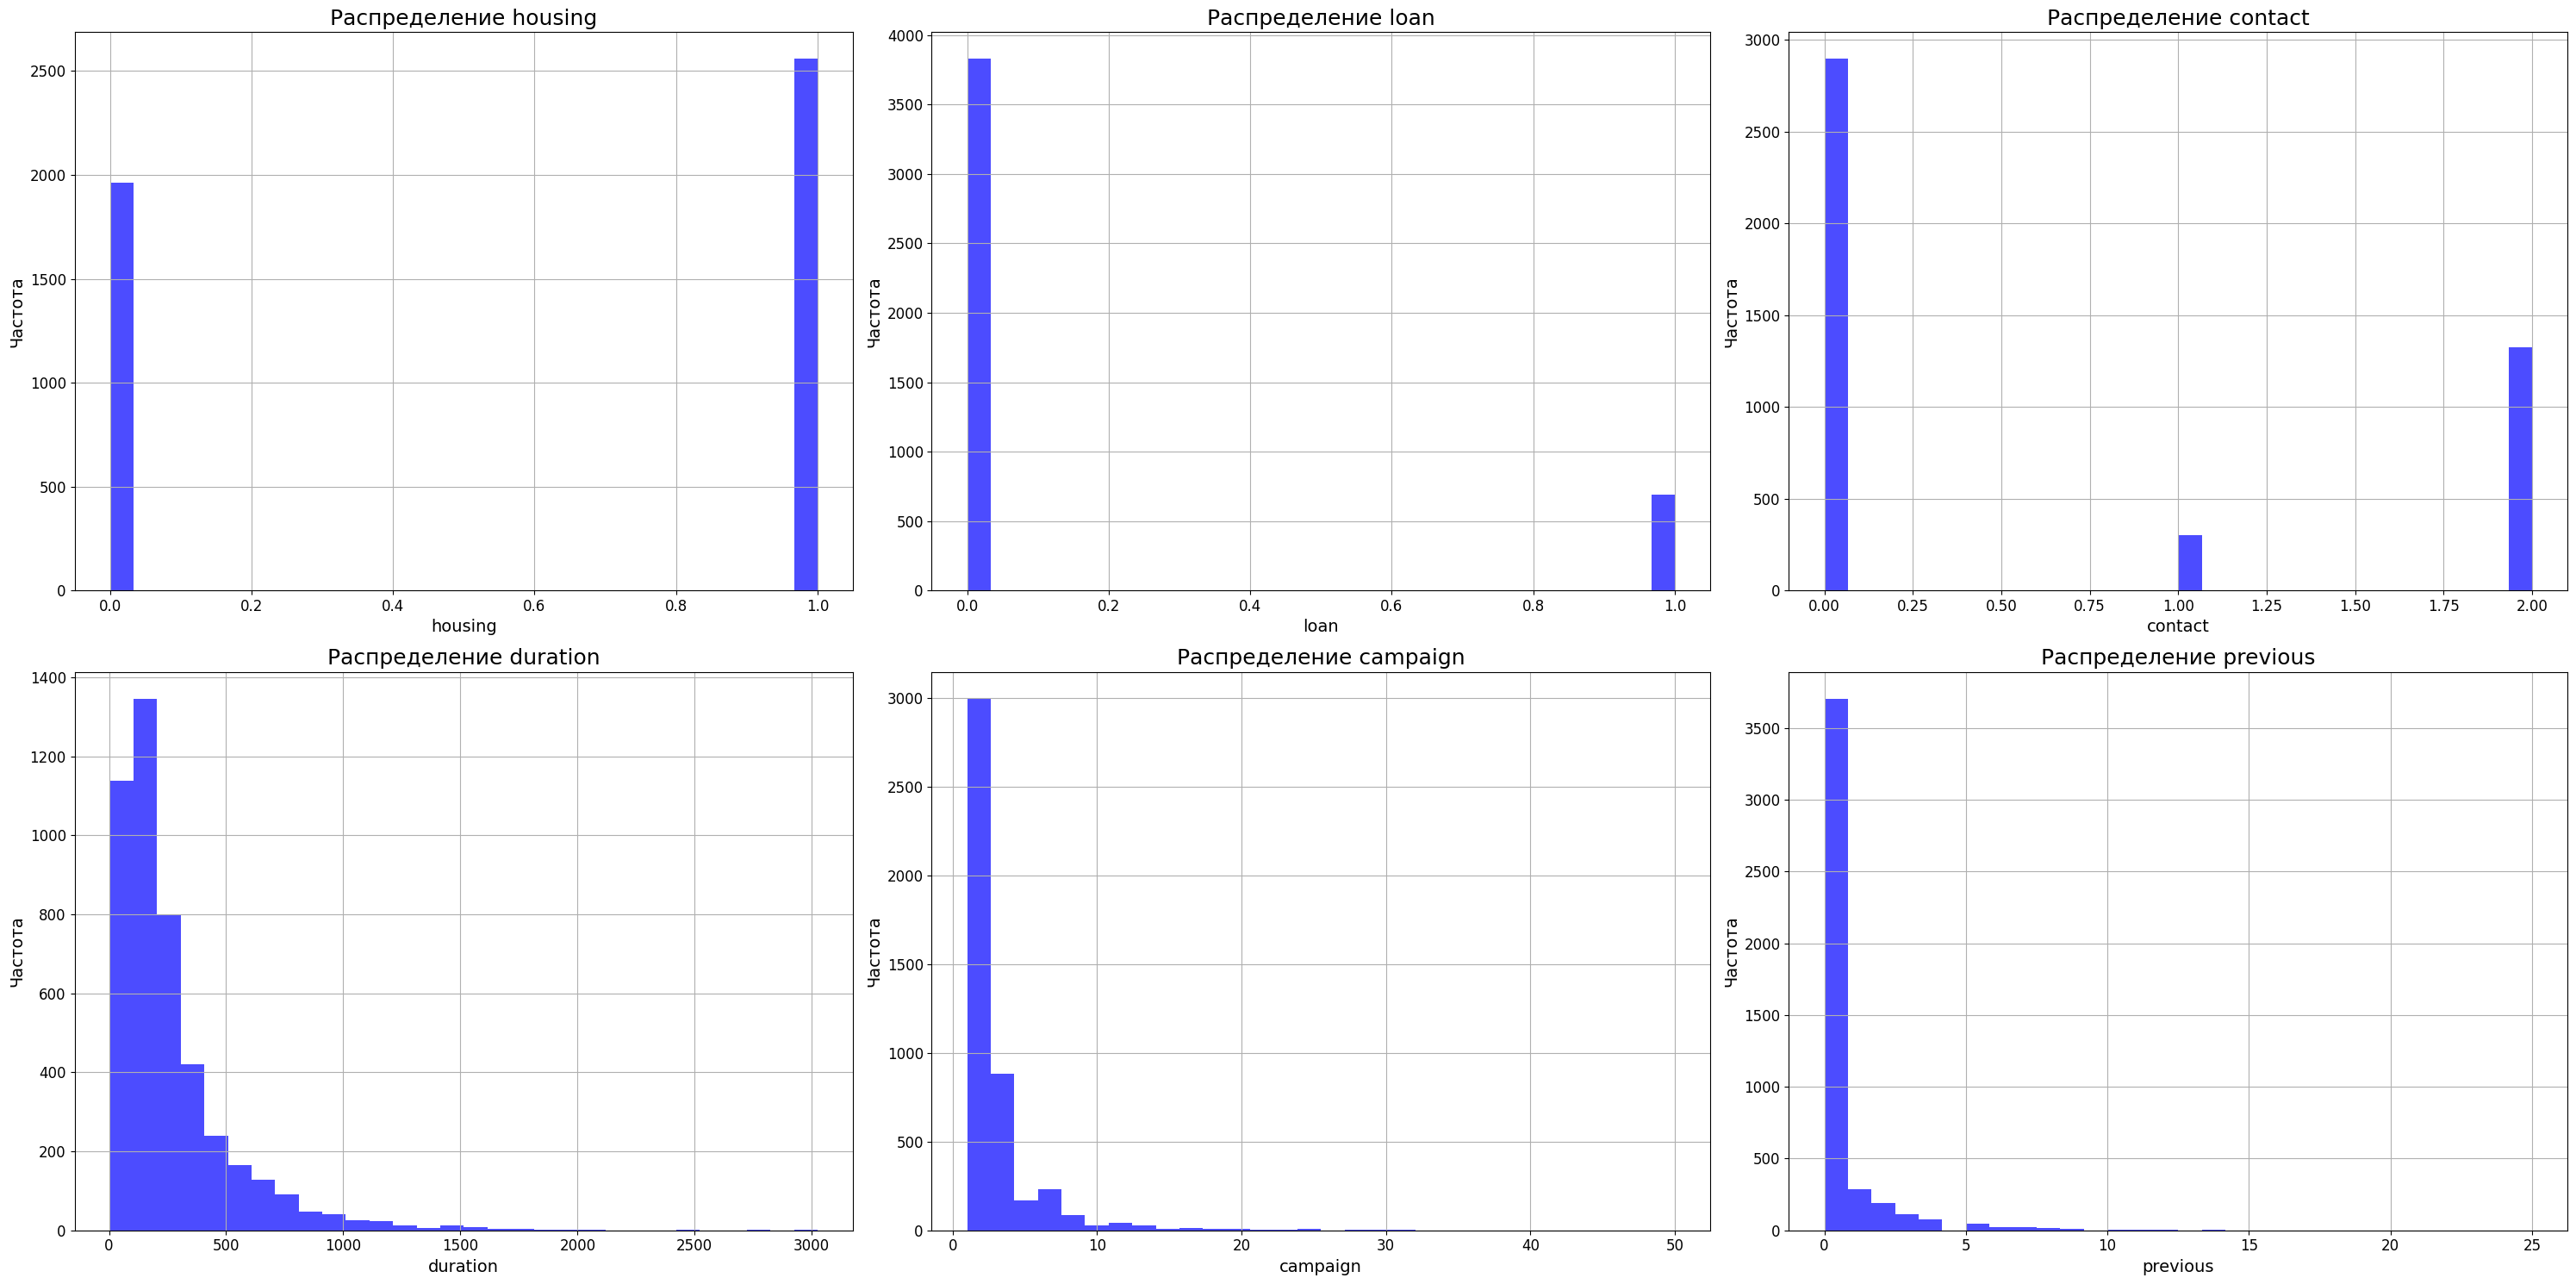

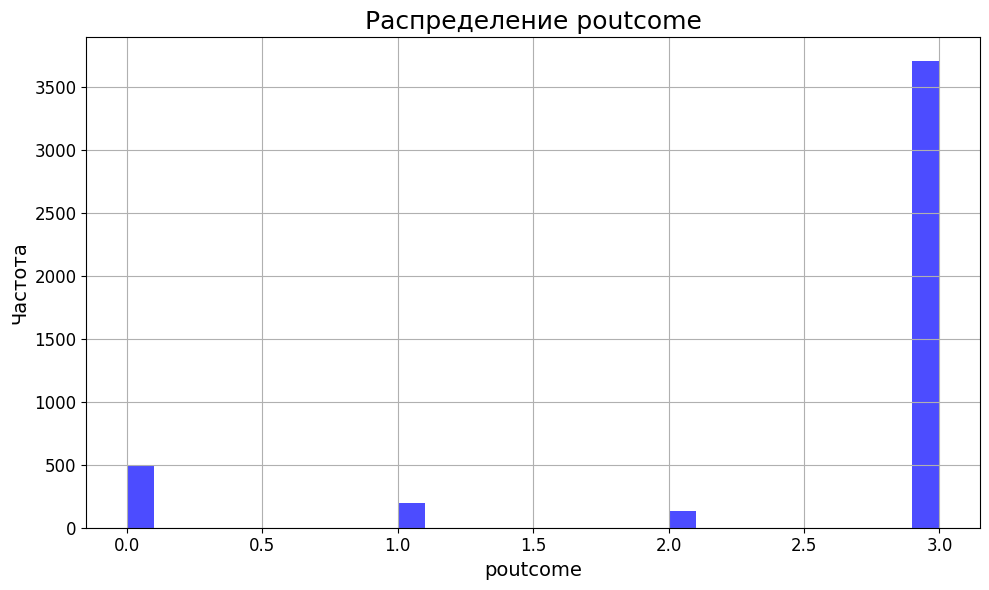

In [87]:
columns_list = df.columns.tolist()

plt.figure(figsize=(30, 15))
for i, feature in enumerate(columns_list[:6], 1):
    plt.subplot(2, 3, i)
    df[feature].hist(bins=30, alpha=0.7, color='blue')
    plt.title(f'Распределение {feature}', fontsize=18)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(30, 15))
for i, feature in enumerate(columns_list[6:12], 1):
    plt.subplot(2, 3, i)
    df[feature].hist(bins=30, alpha=0.7, color='blue')
    plt.title(f'Распределение {feature}', fontsize=18)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
df[columns_list[12]].hist(bins=30, alpha=0.7, color='blue')
plt.title(f'Распределение {columns_list[12]}', fontsize=18)
plt.xlabel(columns_list[12], fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Сделаем Boxplot:

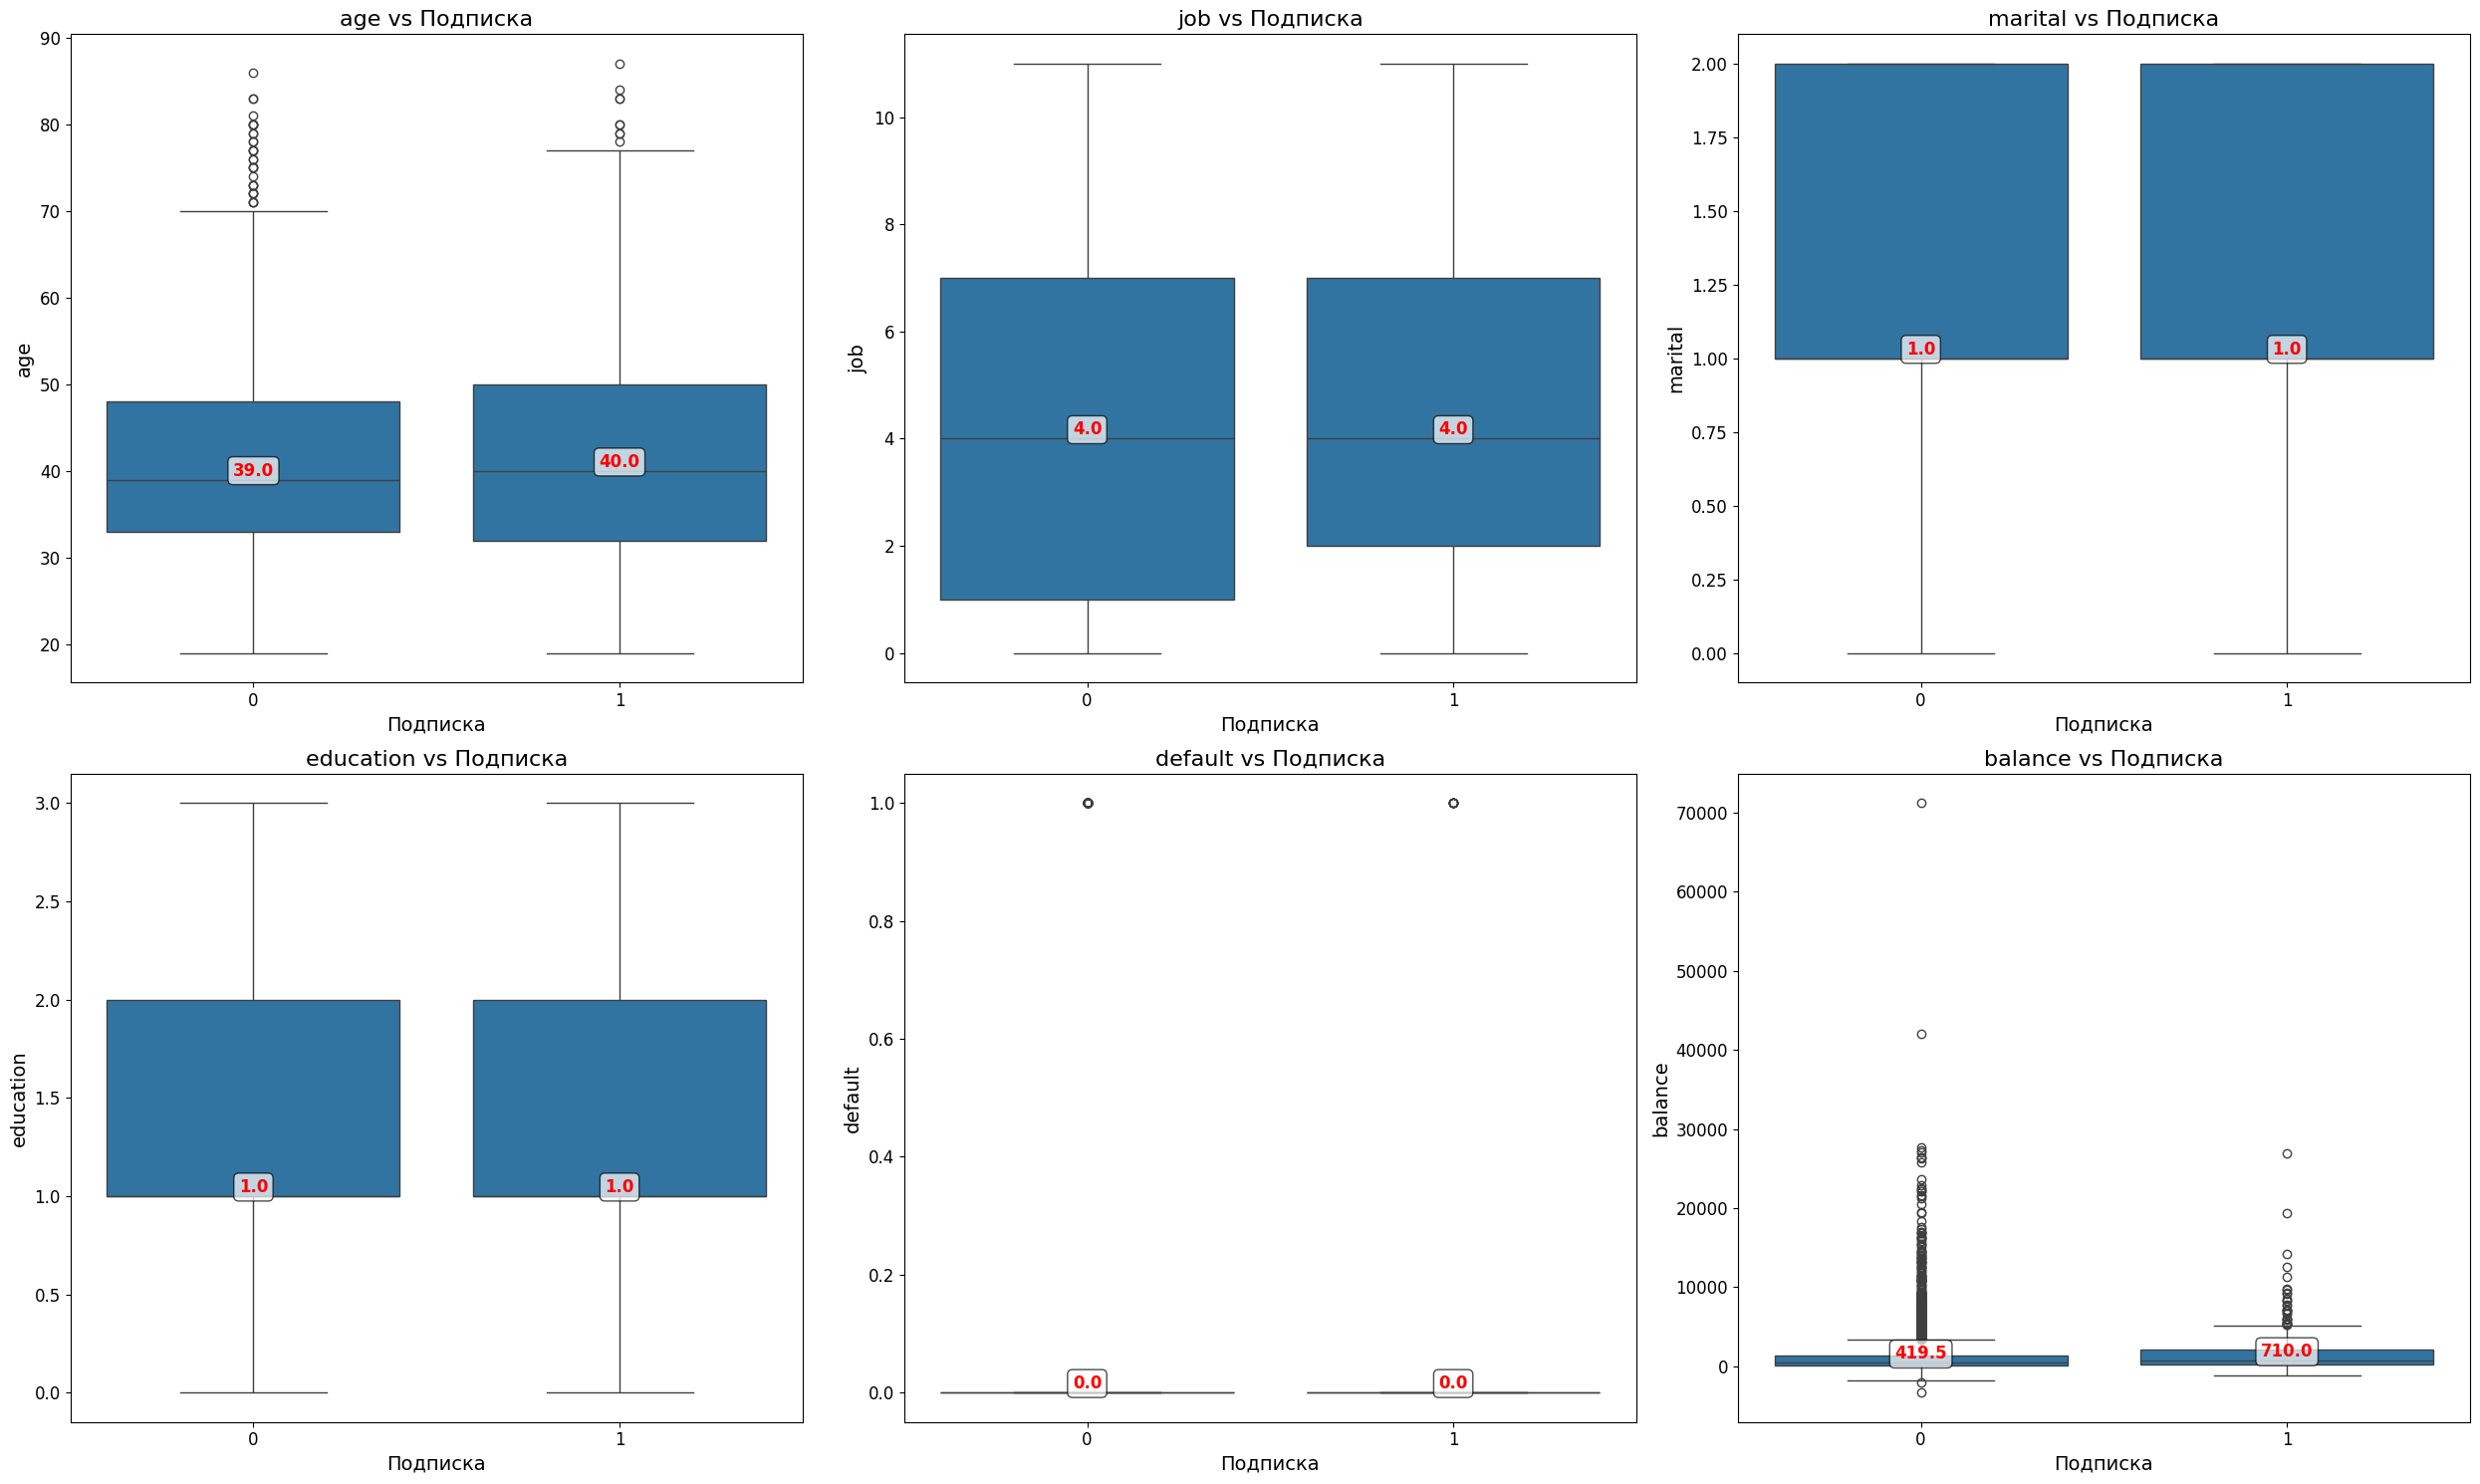

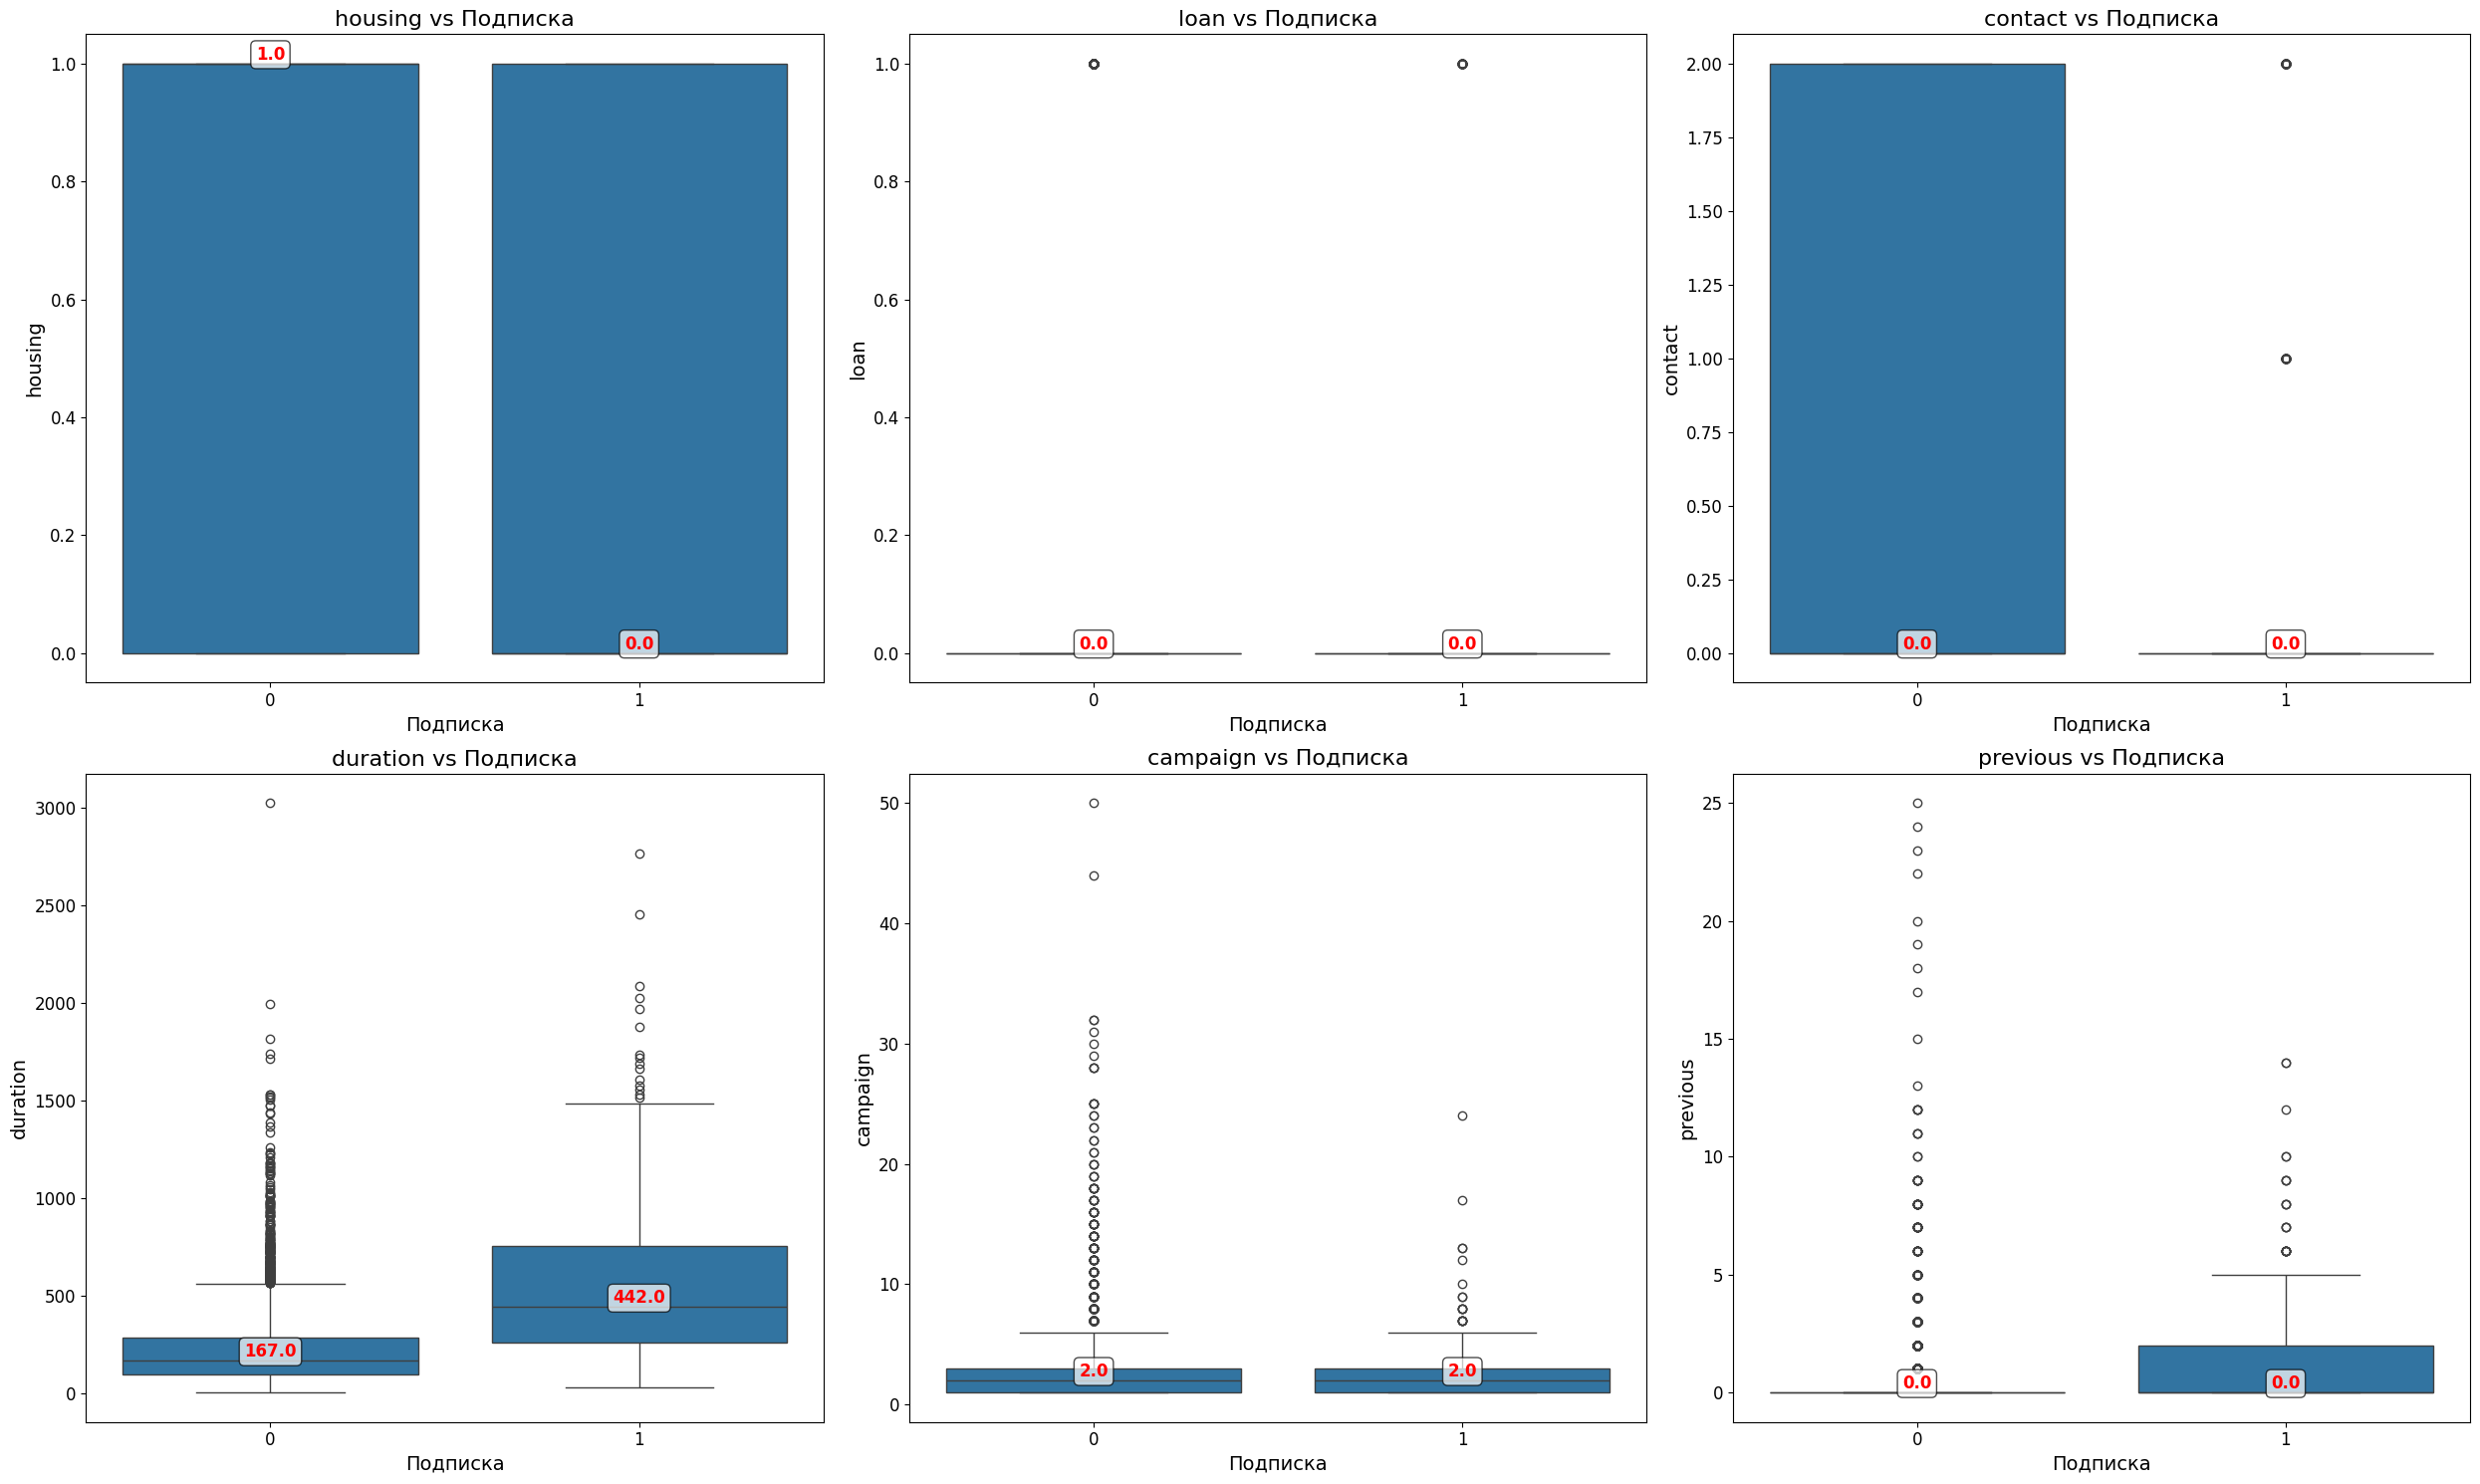

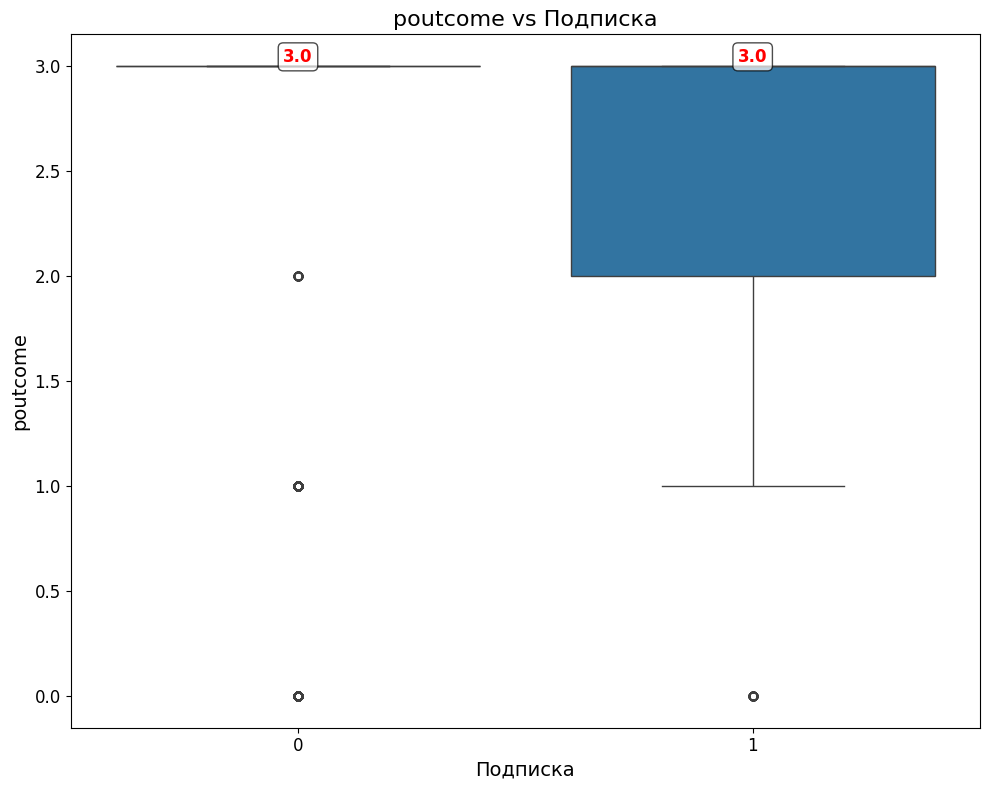

In [88]:
import seaborn as sns


plt.figure(figsize=(25, 15), dpi=100)
for i, (feature, title) in enumerate(zip(columns_list[:6], columns_list[:6]), 1):
    plt.subplot(2, 3, i)
    ax = sns.boxplot(data=df, x='y', y=feature)
    plt.title(f'{title} vs Подписка', fontsize=16)
    plt.xlabel('Подписка', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    medians = df.groupby('y')[feature].median()
    for j, median in enumerate(medians):
        ax.text(j, median, f'{median:.1f}',
                ha='center', va='bottom', fontweight='bold',
                color='red', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.tight_layout()
plt.show()

plt.figure(figsize=(25, 15), dpi=100)
for i, (feature, title) in enumerate(zip(columns_list[6:12], columns_list[6:12]), 1):
    plt.subplot(2, 3, i)
    ax = sns.boxplot(data=df, x='y', y=feature)
    plt.title(f'{title} vs Подписка', fontsize=16)
    plt.xlabel('Подписка', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    medians = df.groupby('y')[feature].median()
    for j, median in enumerate(medians):
        ax.text(j, median, f'{median:.1f}',
                ha='center', va='bottom', fontweight='bold',
                color='red', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8), dpi=100)
ax = sns.boxplot(data=df, x='y', y=columns_list[12])
plt.title(f'{columns_list[12]} vs Подписка', fontsize=16)
plt.xlabel('Подписка', fontsize=14)
plt.ylabel(columns_list[12], fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

medians = df.groupby('y')[columns_list[12]].median()
for j, median in enumerate(medians):
    ax.text(j, median, f'{median:.1f}',
            ha='center', va='bottom', fontweight='bold',
            color='red', fontsize=12,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.tight_layout()
plt.show()

### Выводы:
- Длительность звонка существенно влияет на то, подписался ли клиент на депозит или нет, обычно длительность звонка, того, кто подписался примерно 442 секунды, что больше 10 минут.
- Впринципе от возраста не зависит то, подписался ли клиент или нет.
- От баланса тоже существенно зависит то, подписался или нет. Средний баланс того, кто подписался почти в два раза больше, тем те, кто отказался.
- Видим, что campaign ничего впринципе не значит, оно не сильно влияет на это.
- Наблюдаем, что от previous тоже многое зависит, хотя среднее значение и там и там одинаково, но если клиент до этого принимал участие в других кампаниях, то шансы того, что он подпишется больше.
- видим еще одну закономерность, обычно подписываются к депозиту те, кто не имеет ипотек(housing).
- Остальные же признаки не особо выделяются.

### Теперь перейдем к подбору гиперпараметров
- буду использовать GridSearchCV для поиска лучших параметров для каждого метода
- буду использовать StratifiedKFold для кросс - валидации
- буду использовать StandardScaler для масштабирования
- буду использовать такие методы классификации: RandomForestClassifier, SVC, LogisticRegression, KNeighborsClassifier

разделяем данные

In [89]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:13].tolist()]
Y = df['y']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

Теперь создадим словарь с метриками и их гиперпараметрами, произведем масштабирование и кросс - валидацию.

In [90]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Scaling the data once
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_config = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },

    'SVM': {
        'model': SVC(random_state=42, class_weight='balanced'),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    },

    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },

    'K-Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
}

results = {}
best_models = {}

for model_name, config in models_config.items():

    #Grid_search
    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='f1',
        n_jobs=-1
    )


    grid_search.fit(X_train_scaled, y_train)

    best_models[model_name] = grid_search.best_estimator_

    y_pred = grid_search.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    results[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'test_accuracy': accuracy,
        'test_f1': f1,
        'test_precision': precision,
        'test_recall': recall,
        'predictions': y_pred
    }

#### Теперь же выведем confusion matrix для лучших моделей

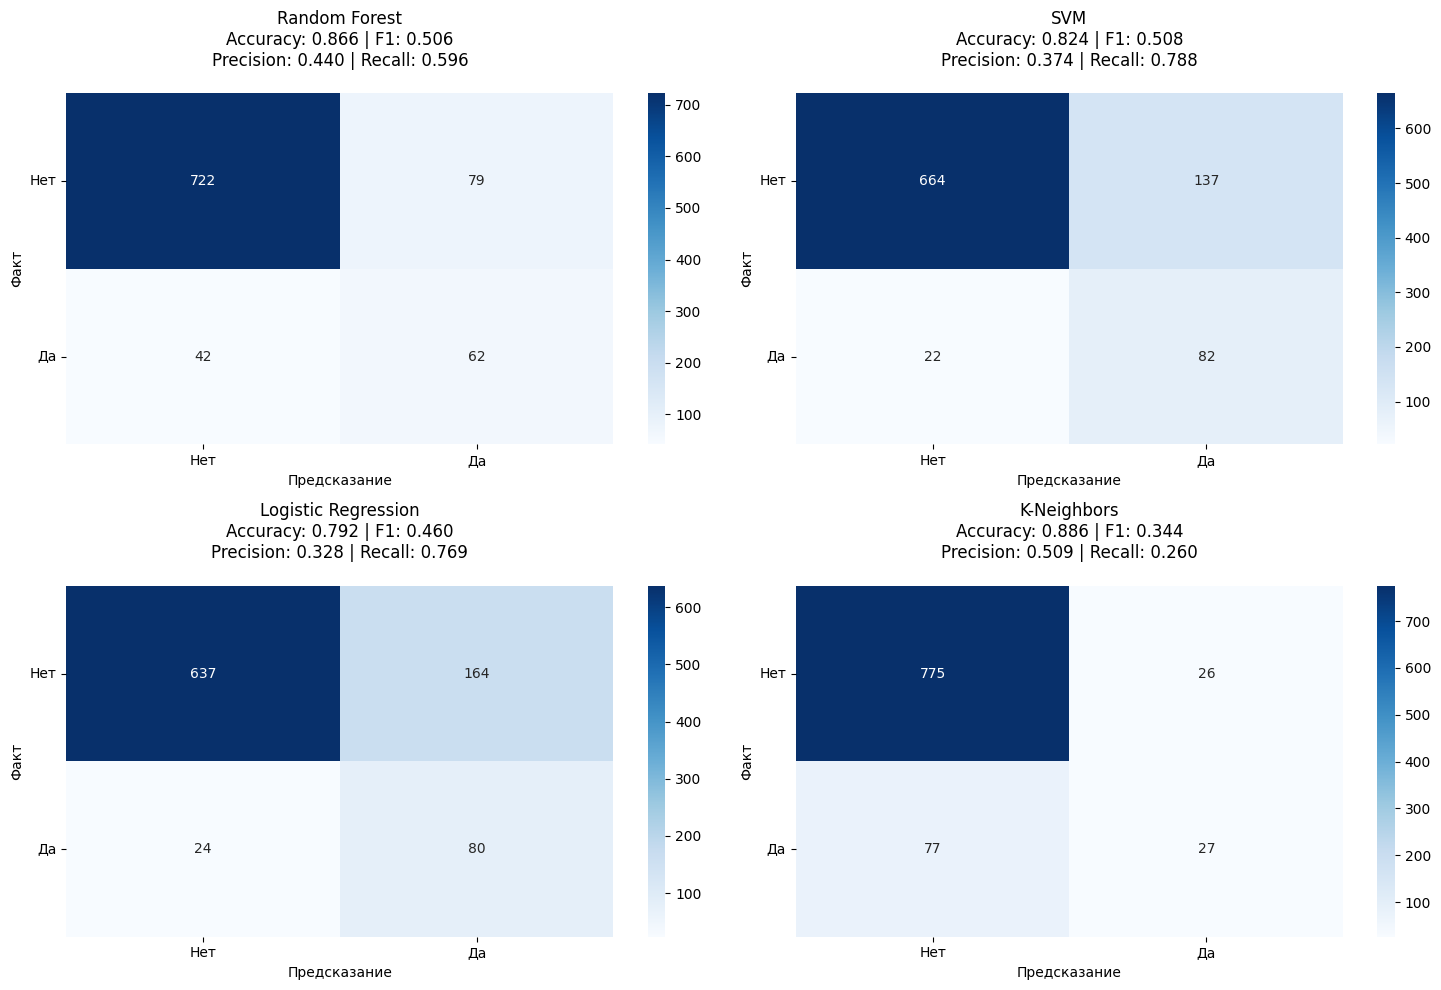

In [91]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15, 10))

for i, model_name in enumerate(best_models.keys(), 1):
    plt.subplot(2, 2, i)

    y_pred = results[model_name]['predictions']
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    accuracy = results[model_name]['test_accuracy']
    f1 = results[model_name]['test_f1']
    recall = results[model_name]['test_recall']
    precision = results[model_name]['test_precision']

    plt.title(f'{model_name}\nAccuracy: {accuracy:.3f} | F1: {f1:.3f}\nPrecision: {precision:.3f} | Recall: {recall:.3f}', pad=20)
    plt.xlabel('Предсказание')
    plt.ylabel('Факт')
    plt.xticks([0.5, 1.5], ['Нет', 'Да'])
    plt.yticks([0.5, 1.5], ['Нет', 'Да'], rotation=0)

plt.tight_layout()
plt.show()

#### Вывод
- Random Forest - Accuracy 0.866 - высокая общая точность. F1-score 0.506 - довольно таки средний, но почти самый лучший среди моделей. Сильные стороны: Находит 62 из 104 реальных депозитов. Слабые стороны: Пропускает 79 потенциальных клиентов (высокий False Negative)
- SVM - Оптимальный для банка. Accuracy 0.824 - довольно неплохо, но F1-score 0.508 - лучший!. Сильные стороны: Находит 82 из 104 депозитов (наибольшее количество), хороший баланс. Слабые стороны: 137 ложных вызова - самые высокие затраты на маркетинг
- Logistic Regression - Стабильная, но не лучшая. Accuracy 0.792 - хорошая общая точность. F1-score 0.460 - средний показатель. Сильные стороны: находит 80 из 104 реальных депозитов. Слабые стороны: 164 ЛОЖНЫХ ВЫЗОВА - это очень много.
- K-Neighbors - Худший для нашей задачи. Accuracy 0.886 - обманчиво высокая за счет предсказания "нет". F1-score 0.344 - самый низкий, модель практически бесполезна. Критично: Находит всего 27 депозита из 104!

### Общий вывод
- для поиска клиентов для подписания депозитов лучше всего использовать SVM, так как нам важно количество клиентов, которые подписали депозит намного больше, чем ДАЖЕ 137 ложных вызова.